In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
data = make_regression(n_samples=1_000, n_features=1, n_targets=1, noise=5)
features = data[0]
target = data[1]

COST:  37516.01598189986
a = 26.953690031473517, b = -0.13053610471432753
-
COST:  1298.5998074766728
a = 26.875212268400965, b = 0.10368003201325968
-
COST:  1295.5499294139681
a = 26.875440762506585, b = 0.10299809353046156
-
[0.10299809353046156, 26.875440762506585]


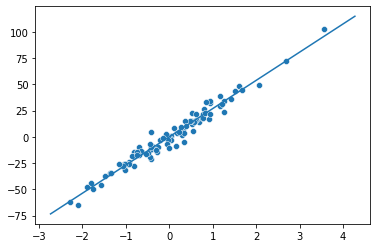

In [19]:
class myLinearRegression:
    def __init__(self, features, target):
        self.alpha = 0.01
        try: 
            self.theta = [0 for _ in range(features.shape[1]+1)]
        except:
            self.theta = [0, 0]
        self.features = np.asarray([np.concatenate(([1], x)) for x in features])
        self.target = target
        
    
    def train(self, gradient='batch'):
        self.batch_gradient_descent(self.features, self.target)

    def predict_one(self, datum):
        prediction = 0
        for coef, feature in zip(self.theta, datum):
            prediction += coef*feature
        return prediction

    def predict(self, data):
        predictions = []
        data_np = np.asarray(data)
        for datum in data_np:
            predictions.append(self.predict_one(datum))
        return pd.Series(predictions)

    def cost_function(self, data, target):
        cost = 0
        data = np.asarray(data)
        target = np.asarray(target)
        for i in range(len(data)):
            h_x = self.predict_one(data[i])
            cost += (h_x - target[i])**2
        return 0.5*cost


    def batch_gradient_descent(self, x, y):
        n = 100
        for _ in range(n):
            current_cost = self.cost_function(x, y)

            for j in range(len(self.theta)):
                sum_gradient = 0
                for i in range(len(x)):
                    h_xi = self.predict_one(x[i])
                    sum_gradient += (y[i] - h_xi) * x[i][j]                
                self.theta[j] += self.alpha * sum_gradient

            print("COST: ", current_cost)
            prev_cost = current_cost
            current_cost = self.cost_function(x, y)
            print(f'a = {self.theta[1]}, b = {self.theta[0]}')
            print('-')
            

            if abs(prev_cost-current_cost) < 0.1:
                break
        
        self.plot_my_line(x, y)
         
        print(self.theta)

    def plot_my_line(self, data, target):
        x = np.linspace(np.min(data)*1.2, np.max(data)*1.2, len(data))
        #print(f'a = {self.theta[0]}, b = {self.intercept}')
        sns.lineplot(x=x, y=x*self.theta[1]+self.theta[0])
        sns.scatterplot(x=self.features[:, 1], y=target)

lr = myLinearRegression(features[:100], target[:100])
lr.train()

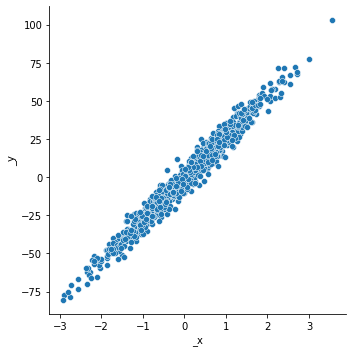

In [5]:
#predictions = lr.predict(diamonds[['carat']])
#print(predictions.head())
sns.relplot(x=features.reshape(-1), y=target, kind='scatter')
#sns.lineplot(x=diamonds['carat'], y=predictions, size=20)
plt.show()
